In [1]:
# !pip install -r requirements.txt
import pandas as pd
pd.set_option("display.precision", 6)
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mt
import seaborn as sns
sns.set(style='darkgrid')
%config InlineBackend.figure_format = 'svg'  # Graphics in SVG format are more sharp and legible

Let's load the dataset and have a look at it,

In [2]:
df = pd.read_csv('dataset/database.csv', index_col=False)
df.head(2).T

,0,1
Official Name of Satellite,AAUSat-4,ABS-2
Country/Organization of UN Registry,NR,NR
Operator/Owner,University of Aalborg,Asia Broadcast Satellite Ltd.
Country of Operator/Owner,Denmark,Multinational
Users,Civil,Commercial
Purpose,Earth Observation,Communications
Detailed Purpose,Automatic Identification System (AIS),NaN
Class of Orbit,LEO,GEO
Type of Orbit,Sun-Synchronous,NaN
Longitude of Geosynchronous Orbit (Degrees),0,75


Looks like we got a lot of NaN values in few columns, let's check how many null values we got,

In [3]:
df.isnull().sum()

Official Name of Satellite                        0
Country/Organization of UN Registry               0
Operator/Owner                                    1
Country of Operator/Owner                         0
Users                                             1
Purpose                                           1
Detailed Purpose                               1051
Class of Orbit                                    1
Type of Orbit                                   521
Longitude of Geosynchronous Orbit (Degrees)      18
Perigee (Kilometers)                              1
Apogee (Kilometers)                               1
Eccentricity                                      1
Inclination (Degrees)                             1
Period (Minutes)                                  3
Launch Mass (Kilograms)                         103
Dry Mass (Kilograms)                            947
Power (Watts)                                   771
Date of Launch                                    4
Expected Lif

From this, it's clear we don't need `'Detailed Purpose', 'Type of Orbit', 'Longitude of Geosynchronous Orbit (Degrees)', 
'Launch Mass (Kilograms)', 'Dry Mass (Kilograms)', 'Power (Watts)', 'Expected Lifetime (Years)'`

In [4]:
df = pd.read_csv('dataset/database.csv', usecols=[0, 1, 2, 3, 4, 5, 7, 10, 11, 12, 18, 19, 20, 21, 22, 23])
df.head(2).T

,0,1
Official Name of Satellite,AAUSat-4,ABS-2
Country/Organization of UN Registry,NR,NR
Operator/Owner,University of Aalborg,Asia Broadcast Satellite Ltd.
Country of Operator/Owner,Denmark,Multinational
Users,Civil,Commercial
Purpose,Earth Observation,Communications
Class of Orbit,LEO,GEO
Perigee (Kilometers),442,35778
Apogee (Kilometers),687,35793
Eccentricity,0.0177,0.000178


Now that we have all the necessary columns loaded in the Dataframe, let's convert the `Date of Launch` in Datetime format,

In [5]:
df['date'] = pd.to_datetime(df['Date of Launch'])
df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month
df.head(2).T

,0,1
Official Name of Satellite,AAUSat-4,ABS-2
Country/Organization of UN Registry,NR,NR
Operator/Owner,University of Aalborg,Asia Broadcast Satellite Ltd.
Country of Operator/Owner,Denmark,Multinational
Users,Civil,Commercial
Purpose,Earth Observation,Communications
Class of Orbit,LEO,GEO
Perigee (Kilometers),442,35778
Apogee (Kilometers),687,35793
Eccentricity,0.0177,0.000178


In [6]:
df.shape

(1420, 19)

Let's answer a few questions,

1. How many satellites each country has launched ?
 
 
2. How many satellites each operator has ?


3. For each geometric orbits type (Low Earth orbit(LEO), Medium Earth orbit(MEO), Geosynchronous orbit(GEO)) how many satellites are there ? 


4. How many satellites have been launched by each country every year ?

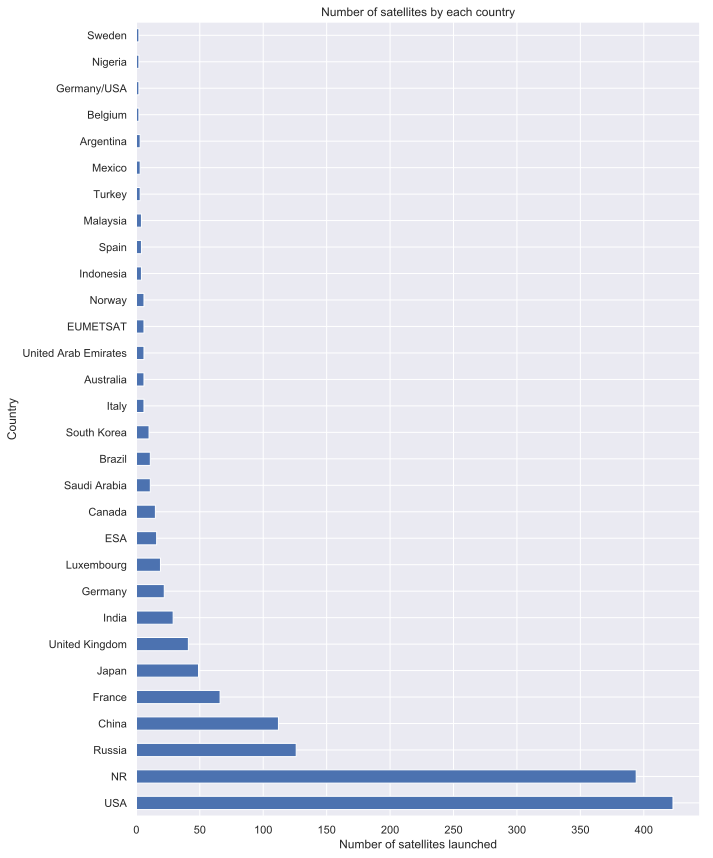

In [7]:
df['Country/Organization of UN Registry'].value_counts().head(30).plot(kind='barh', figsize=(10, 12))
plt.xlabel('Number of satellites launched')
plt.ylabel('Country')
plt.title('Number of satellites by each country')
plt.tight_layout()
plt.show()
plt.close()

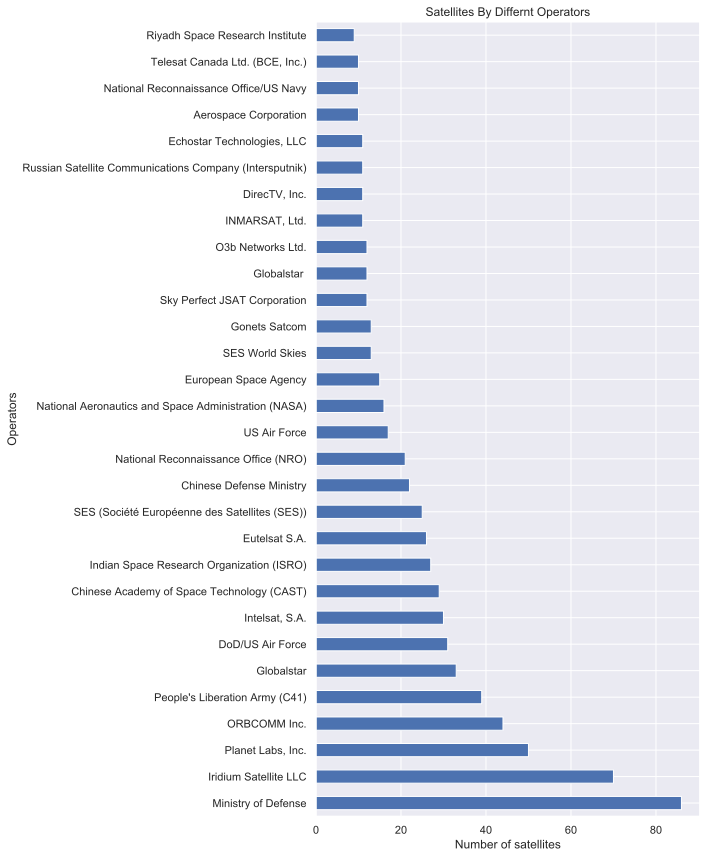

In [8]:
operators = df['Operator/Owner'] 
operators.value_counts().head(30).plot(kind='barh', figsize=(10, 12))
plt.title('Satellites By Differnt Operators')
plt.ylabel('Operators')
plt.xlabel('Number of satellites')
plt.tight_layout()
plt.show()
plt.close()

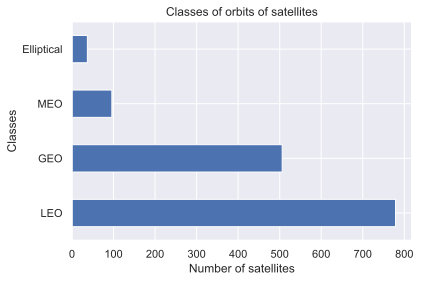

In [9]:
classes = df['Class of Orbit']
classes.value_counts().head(4).plot(kind='barh')
plt.title('Classes of orbits of satellites')
plt.ylabel('Classes')
plt.xlabel('Number of satellites')
plt.tight_layout()
plt.show()
plt.close()

In [10]:
counts = pd.crosstab(df['date'], df['Country/Organization of UN Registry'])
counts.head(5).T

date,1974-11-15 00:00:00,1978-06-16 00:00:00,1988-09-29 00:00:00,1989-09-25 00:00:00,1990-04-25 00:00:00
Country/Organization of UN Registry,,,,,
Algeria,0,0,0,0,0
Argentina,0,0,0,0,0
Australia,0,0,0,0,0
Austria,0,0,0,0,0
Azerbaijan,0,0,0,0,0
Belarus,0,0,0,0,0
Belgium,0,0,0,0,0
Bolivia,0,0,0,0,0
Brazil,0,0,0,0,0


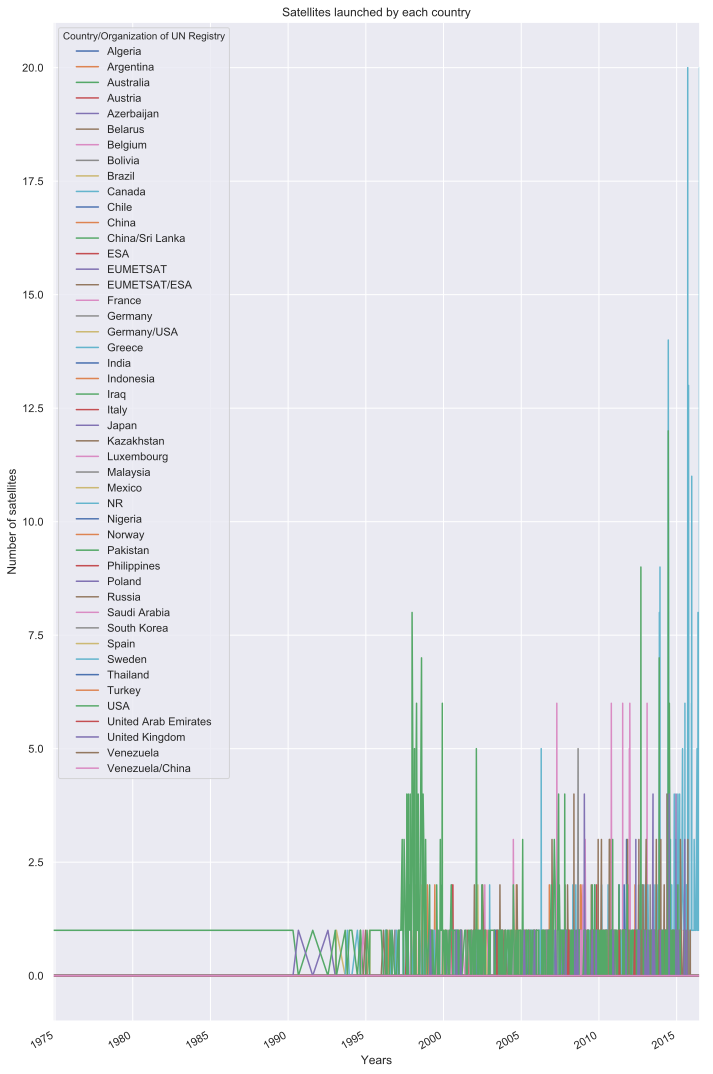

In [11]:
counts.plot(figsize=(10, 15))
plt.title('Satellites launched by each country')
plt.ylabel('Number of satellites')
plt.xlabel('Years')
plt.tight_layout()
plt.show()
plt.close()

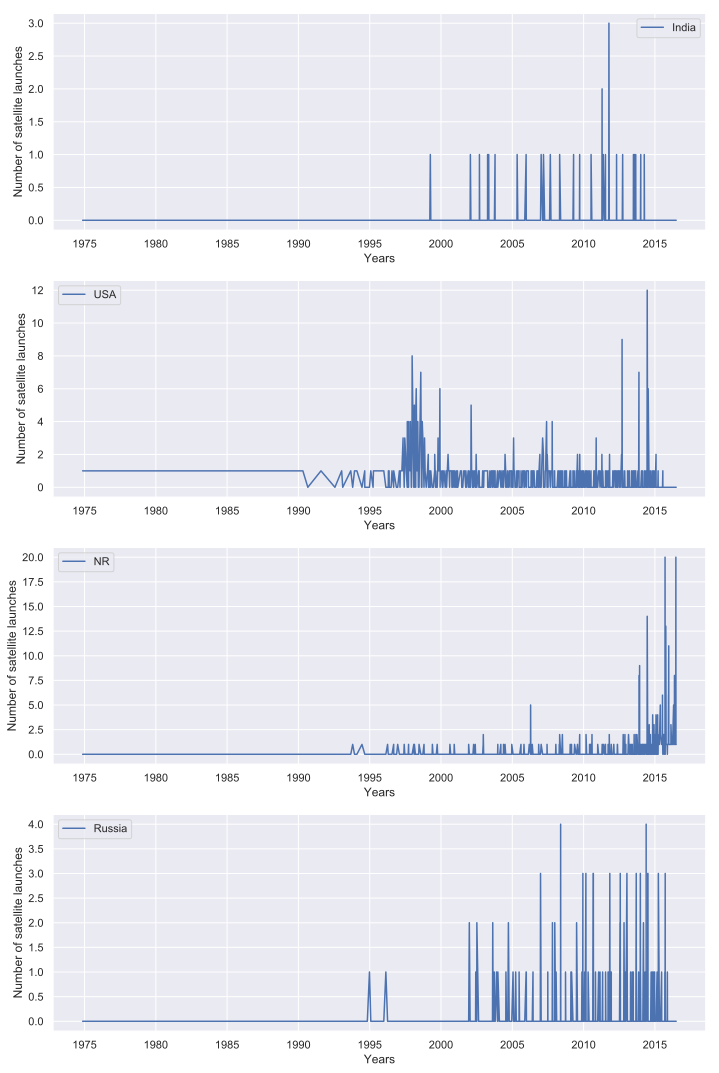

In [12]:
fig, (a1, a2, a3, a4) = plt.subplots(4, 1, sharex=False, sharey=False)
fig.set_size_inches(10, 15)

a1.plot(counts['India'])
a1.legend()
a1.set_xlabel('Years')
a1.set_ylabel('Number of satellite launches')

a2.plot(counts['USA'])
a2.legend()
a2.set_xlabel('Years')
a2.set_ylabel('Number of satellite launches')

a3.plot(counts['NR'])
a3.legend()
a3.set_xlabel('Years')
a3.set_ylabel('Number of satellite launches')

a4.plot(counts['Russia'])
a4.legend()
a4.set_xlabel('Years')
a4.set_ylabel('Number of satellite launches')

plt.tight_layout()
plt.show()
plt.close()